# imports

In [ ]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# setup dataset

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)

#dataset.drop(dataset[dataset[column] == value].index, inplace=True)
dataset.drop([columns[0], columns[1]], axis=1, inplace=True)

## *(optional) Info*

In [ ]:
print("Dataset size: {}\n".format(dataset.shape))
print("First 3 entries:\n {}\n".format(dataset.head(3)))
print("Grouped by {}\n".format(dataset.groupby('class').size()))

Dataset size: (150, 3)

First 3 entries:
    petal-length  petal-width        class
0           1.4          0.2  Iris-setosa
1           1.4          0.2  Iris-setosa
2           1.3          0.2  Iris-setosa

Grouped by class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64



# Plot

scatter plots 

(0.705, 7.195, -0.01999999999999999, 2.62)

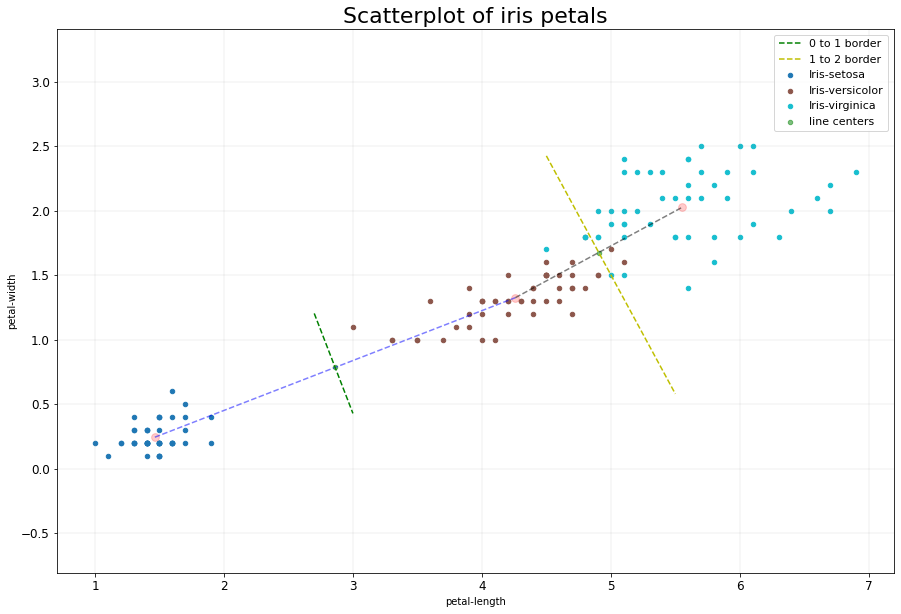

In [16]:
def draw_border(mc):
    ax.plot(
        np.linspace(mc[0][0], mc[1][0]),
        np.linspace(mc[0][1], mc[1][1]),
        '--b',
        alpha=0.5
    )
    ctr_x = (mc[1][0] + mc[0][0]) / 2
    ctr_y = (mc[1][1] + mc[0][1]) / 2
    ax.scatter(
        ctr_x,
        ctr_y,
        s=20, c='green', alpha=0.5
    )
    k = (mc[1][1] - mc[0][1]) / (mc[1][0] - mc[0][0])
    prp = lambda x: -(1 / k) * (x - ctr_x) + ctr_y
    _x = np.linspace(2.7, 3)
    ax.plot(_x, prp(_x), '--g', label="0 to 1 border")

    ax.plot(
        np.linspace(mc[1][0], mc[2][0]),
        np.linspace(mc[1][1], mc[2][1]),
        '--k',
        alpha=0.5
    )
    ctr_x = (mc[2][0] + mc[1][0]) / 2
    ctr_y = (mc[2][1] + mc[1][1]) / 2
    ax.scatter(
        ctr_x,
        ctr_y,
        s=20, c='green', alpha=0.5, label="line centers"
    )
    k = (mc[2][1] - mc[1][1]) / (mc[2][0] - mc[1][0])
    prp = lambda x: -(1 / k) * (x - ctr_x) + ctr_y
    _x = np.linspace(4.5, 5.5)
    ax.plot(_x, prp(_x), '--y', label="1 to 2 border")

_, ax = plt.subplots(figsize=(15,10))

groups = np.unique(dataset['class'])
colors = [matplotlib.pyplot.cm.tab10(i / float(len(groups) - 1)) for i in range(len(groups))]


middle_coords = []
for i, group in enumerate(groups):

    group_data: pd.DataFrame = dataset.loc[dataset["class"] == group, :]
    middle_x = group_data[group_data.columns[0]].sum() / group_data[group_data.columns[0]].size
    middle_y = group_data[group_data.columns[1]].sum() / group_data[group_data.columns[1]].size

    ax.scatter(
        dataset.columns[0],
        dataset.columns[1],
        data=group_data,
        s=20, c=colors[i], label=str(group)
    )

    ax.scatter(
        middle_x,
        middle_y,
        s=60, c='red', alpha=0.2
    )
    middle_coords.append((middle_x, middle_y))


plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

draw_border(middle_coords)

plt.gca().set(xlim=(0, 7), ylim=(0, 3), xlabel=dataset.columns[0], ylabel=dataset.columns[1])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Scatterplot of iris petals", fontsize=22)
plt.legend(fontsize=11)
plt.axis("equal")

# Вывод

##1:
> вероятность правильного решения - 100%

> ошибки отсутсвуют

##2:
> Вероятность правильного решения - 97%

> **Oшибки**:

>> 1го рода: _____

>> 2го рода: _____

##Общяя погрешность: 
из 150 участвующих в под данные решения не подходят 3 обьекта => вероятность правильного решения - 98%